# <span style="color:lightcoral"> RSNA Metadata Exploratory Analysis</span>  <a class="anchor"  id="top"></a>

![](https://images.unsplash.com/photo-1647221597837-ff41b73a7f54?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1yZWxhdGVkfDE1fHx8ZW58MHx8fHw%3D&auto=format&fit=crop&w=800&q=60)

### [**1. Introduction**](#introduction)

   [Breast Cancer and Mammography](#introsubsection1)
   
   [Competition Objective and Success Metrics](#introsubsection2)
    
   [Provided Data](#introsubsection3)
    
   [What this notebook is all about](#introsubsection4)
   
---
    
### [**2. Load Data**](#loaddata)

---

### [**3. Metadata Structure**](#meta)

   [Column Descriptions](#meta1)

   [Metadata Interaction](#meta2)
   
---

### [**4. Profiling Report**](#profile)

   [Early Observations](#profile1)

   [Patient Level Profiles](#profile2)

   [Missing Treatment](#profile3)

   [Bivariate Analysis](#profile4)
   
   - [Age](#profile5)
   - [Site](#profile6)
   - [Machine](#profile7)
   - [View](#profile8)
   - [BIRADS & Density](#profile9)
   
---

### [**5. Insights**](#insights)

   [Data Insights](#insights1)
    
   [Patient Level Insights](#insights2)
    
   [Age Related Insights](#insights3)
    
### [**6. Conclusion**](#conclusion)

---
---


#  <span style="color:lightcoral"> 1. Introduction </span> <a class="anchor"  id="introduction"></a>

[Main Menu](#top) | [< prev](#top) | [next >](#introsubsection1)


#### <span style="color:salmon">Breast Cancer and Mammography <a class="anchor"  id="introsubsection1"></a></span>
[Main Menu](#top) | [< prev](#introduction) | [next >](#introsubsection2)

Breast cancer is a common type of cancer that affects women and, less commonly, men. According to the World Health Organization (WHO), breast cancer is the most common cancer among women worldwide, accounting for approximately 25% of all cases. In the United States, breast cancer is the second most common type of cancer in women, after skin cancer.

Mammography is a type of imaging test that uses low-dose x-rays to examine the breasts. It is the most common test used to detect breast cancer. Mammograms can be used to screen for breast cancer in women who have no symptoms and to diagnose breast cancer in women who do have symptoms, such as a lump in the breast or abnormal discharge from the nipple.

Mammograms are generally considered to be a safe and effective way to detect breast cancer, but they are not perfect. They can sometimes miss breast cancers, especially in women with dense breast tissue. Additionally, they can sometimes produce false-positive results, which can lead to unnecessary anxiety and further testing.

![](https://images.unsplash.com/photo-1579154341098-e4e158cc7f55?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mnx8bWFtbW9ncmFtfGVufDB8MHwwfHw%3D&auto=format&fit=crop&w=800&q=60)

---

#### <span style="color:salmon">Competition Objective & Success Metrics <a class="anchor"  id="introsubsection2"></a></span>
[Main Menu](#top) | [< prev](#introsubsection1) | [next >](#introsubsection3)

Currently, early detection of breast cancer requires the expertise of highly-trained human observers, making screening mammography programs expensive to conduct. A looming shortage of radiologists in several countries will likely worsen this problem.

Early detection and treatment are critical to reducing cancer fatalities, and an accurate inference model that uses mammography images to predict cancer will help reduce the burden on human observers by streamlining the screening process.

The model will be evaluated on the probablistic F1 Score. F1 Score is the harmonic mean of precision and recall.

---

#### <span style="color:salmon">Provided Data <a class="anchor"  id="introsubsection3"></a></span>
[Main Menu](#top) | [< prev](#introsubsection2) | [next >](#introsubsection4)

The provided data and test sets has multiple components - 

1. train.csv - Information about each mammography image. A patient has multiple images. 'cancer' variable is the target or the dependent variable

2. test.csv - Information about each mammography image of test patients. The available information in train and test is different
> Note : Only a single patient information is available for download. The entire test data will be made available to the notebook upon submission

3. sample_submission.csv - A format in which the predicted probability of cancer is provided for each breast (Left and Right) for a test patients

4. train_images - A corresponding image for each observation in train.csv. This folder is structured with subfolders for every patient and each patient has multiple images.

5. test_images - In the same structure as train_images, a subfolder for a single test patient is provided with four images

![](images/data%20structure(1).png)

---
#### <span style="color:salmon">What this notebook is all about <a class="anchor"  id="introsubsection4"></a></span>
[Main Menu](#top) | [< prev](#introsubsection3) | [next >](#loaddata)

In this notebook, we'll be looking at the metadata information provided in the train.csv and test.csv files along with a look at the sample_submission.csv file

---
---

#### <span style="color:teal"> We'll begin by importing a few libraries </span>
- Pandas and Numpy for regular evaluation
- Seaborn, Matplotlib and Pyplot for visualisation
- Pandas Profiling for EDA report
- Warnings for suppressing warnings in the notebook

In [10]:
%matplotlib inline
#magic command to show the matplotlib plots in the output cell of the notebook

#basic libraries
import pandas as pd
import numpy as np
import os

#visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
'''
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.impute import SimpleImputer

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.offline as offline
import plotly.graph_objects as go
'''
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

# <span style="color:lightcoral"> 2. Load Data  <a class="anchor"  id="loaddata"></a></span>
[Main Menu](#top) | [< prev](#introsubsection4) | [next >](#meta)

Loading the three csv files using 'read_csv' API of the pandas library

In [11]:
train=pd.read_csv("data/train.csv")
test=pd.read_csv("data/test.csv")
sample_submission=pd.read_csv("data/sample_submission.csv")


---
---

# <span style="color:lightcoral"> 3. Metadata Structure  <a class="anchor"  id="meta"></a></span>
[Main Menu](#top) | [< prev](#loaddata) | [next >](#meta1)

A cursory look at each of the files

In [12]:
print("\nColumns in each of the datasets")
print("\nData: train.csv")
print(train.columns)
print("\nData: test.csv")
print(test.columns)
print("\nData: sample_submission.csv")
print(sample_submission.columns)


Columns in each of the datasets

Data: train.csv
Index(['site_id', 'patient_id', 'image_id', 'laterality', 'view', 'age',
       'cancer', 'biopsy', 'invasive', 'BIRADS', 'implant', 'density',
       'machine_id', 'difficult_negative_case'],
      dtype='object')

Data: test.csv
Index(['site_id', 'patient_id', 'image_id', 'laterality', 'view', 'age',
       'implant', 'machine_id', 'prediction_id'],
      dtype='object')

Data: sample_submission.csv
Index(['prediction_id', 'cancer'], dtype='object')


In [13]:
print("\nA few rows of train.csv\n")
train.head()


A few rows of train.csv



,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [14]:
print("\nRows of train.csv\n")
test.head()


Rows of train.csv



,site_id,patient_id,image_id,laterality,view,age,implant,machine_id,prediction_id
0,2,10008,736471439,L,MLO,81,0,21,10008_L
1,2,10008,1591370361,L,CC,81,0,21,10008_L
2,2,10008,68070693,R,MLO,81,0,21,10008_R
3,2,10008,361203119,R,CC,81,0,21,10008_R


In [15]:
print("\nRows of sample_submission.csv\n")
sample_submission.head()


Rows of sample_submission.csv



,prediction_id,cancer
0,10008_L,0.021168
1,10008_R,0.021168


---
### <span style="color:teal">Column Descriptions (as provided in the problem statement)  <a class="anchor"  id="meta1"></a></span>
[Main Menu](#top) | [< prev](#meta) | [next >](#meta2)

- site_id - ID code for the source hospital.
- patient_id - ID code for the patient.
- image_id - ID code for the image.
- laterality - Whether the image is of the left or right breast.
- view - The orientation of the image. The default for a screening exam is to capture two views per breast.
- age - The patient's age in years.
- implant - Whether or not the patient had breast implants. Site 1 only provides breast implant information at the patient level, not at the breast level.
- density - A rating for how dense the breast tissue is, with A being the least dense and D being the most dense. Extremely - dense tissue can make diagnosis more difficult. Only provided for train.
- machine_id - An ID code for the imaging device.
- cancer - Whether or not the breast was positive for malignant cancer. The target value. Only provided for train.
- biopsy - Whether or not a follow-up biopsy was performed on the breast. Only provided for train.
- invasive - If the breast is positive for cancer, whether or not the cancer proved to be invasive. Only provided for train.
- BIRADS - 0 if the breast required follow-up, 1 if the breast was rated as negative for cancer, and 2 if the breast was rated as normal. Only provided for train.
- prediction_id - The ID for the matching submission row. Multiple images will share the same prediction ID. Test only.
- difficult_negative_case - True if the case was unusually difficult. Only provided for train.
 <a class="anchor"  id="meta2"></a>
 
 [Main Menu](#top) | [< prev](#meta1) | [next >](#profile)
 
![Metadata interactions](https://lh3.googleusercontent.com/RIKOmpwX6LcgxL76ybSiiCocNGrYiKLtL2dttPad_ltlALn5PuOKVRgb8dAee5j1tguP9mM7y63Iz9ceaAWmkbZMhYMtmj_kfxY4Q-SmqnoF10k2CH_npxL54jJAYGN_NkDWu9Abves9xrS6QlGbAgU-oQxb670wEy76RTBQ_UVc_miZZBdQ-s24MEUlzH9jeNKS5-bILv7_BrVWrefxkhCGyS9D_wJhwHJcS3MLphw34OkBBhJPIFellIe05z5OXCDdSeXKbkOBj3C4DJ9hW1XY5S_0a7l8PaQAhvBVkGN0toVCHY_vQjyPaVFsmM6B8WMH2v18IIfpBsnCsAIy8MbBjr3UeYgM2F2U3t9N4gcFp5BT6D_kIFxuOMQP0AathJBhwAZ_Svk7QDm4Iq6RhPxyCbR5f1rgiSbPzSgq1-IjpUlD1fsq0R6_utRgEeQLHheB65n2uRywVCOpzt6RMcbHQFhY7Pkf4U6Q2IbmV9I-c2s_pT_wdTtyX8IuRdxMk0d5byOPUfmWYOoUCASgLMyDxWHlY2eaobcYV7K_z85hxQmEv-C3QNeJkQ0p2nv1vFs5NpCwuaBffXI_fE789Zf0VA8v0l_FMaRzUDm3hFo5MOJlmQo0scNCrOeqJdx737ohImaAQeQVlCjABCV0hKNw1xykdMjA0RjoZKLGc9AT7n3d27IevOuE7CRIMg1eVWvinmxg5iYnT6YMM5qFqGOpfocXUclhm2Vqjmqr9gL7bAma7Quvcrc7zLGM7Z9VPjbpnaA-JIT-k8JppBBXyz84yUFE-76yyQAB-_AUMxzaZXAGhQuFaCfWsl36Y8Pfdc1-n3UQY7fX3AzFh4pVKz-zN5GkVrXnJcbIm8zsnLvldEktybFmu7vRtRCavNENWHPjue4RicxngklcunyLSd86W9SSncFQeAu4yoj5YGpw3-ukaUXYvzowjbohMWVtKVMa73MBYUfjG1Ke90o=w2880-h1228-no?authuser=0) 



---
---

# <span style="color:lightcoral"> 4. Profiling Report  <a class="anchor"  id="profile"></a></span>
[Main Menu](#top) | [< prev](#meta2) | [next >](#profile1)


Pandas Profiling is a powerful library to access all the exploratory information about the data

In [ ]:
profile=ProfileReport(train,title="RSNA Train data profiling", explorative=True)
profile.to_notebook_iframe()

---
### <span style="color:teal"> Early Observations  <a class="anchor"  id="profile1"></a></span>
[Main Menu](#top) | [< prev](#profile) | [next >](#profile2)

- 'image_id' is the unique key present in the training data
- The training data has observations for 54,706 images (no duplicates present)
- This information is for 11,913 patients
- The training data has observations from two sites
- Images are of 6 views. However, MLO and CC views account for >99% images
- 'age' ranges from 26 years to 89 years. For 0.1% (37) images Age is missing
- 'cancer', the dependent or target variable has a rate of 2.1% amongst 54,706 images
- 5.4% of the images warranted a biopsy
- 1.5% of the images showed an invasive cancer. For all positive cancer images 70.6% showed invasive cancer
- BIRADS information is missing for a majority of images
- Less than 2.7% images were done on breasts with implants
- A large proportion of density information is missing
- 10 different machines were used across the two sites
- 15% of all image scans were difficult to infer as negative for cancer
---

### <span style="color:teal"> Patient Level Profiles  <a class="anchor"  id="profile2"></a></span>
[Main Menu](#top) | [< prev](#profile1) | [next >](#profile3)

While the entire training data is at an image level, it is intriguing how this translates at a patient level
We will try to look at the following -
- How many patients out of the 11,913 were diagnosed with cancer?
- How many patients were advised for a biopsy?
- How many patients had invasive cancer?
- How many patients had implants and how did that correspond to having cancer?

---
#### <span style="color:PaleVioletRed">**Unique cancer patients**</span>

We'll group the data by 'patient_id' and if the sum of 'cancer' indicator is not zero, we will count them as cancer patients

In [17]:
total_patients=train['patient_id'].nunique()
unique_cancer_patients=np.where(train.groupby(['patient_id'])['cancer'].sum().reset_index()['cancer']>0,1,0).sum()
print("\nThe total number of patients diagnosed with cancer is " + str(unique_cancer_patients))
print("This indicates a prevalence rate of " + str(round(unique_cancer_patients/total_patients*100,2)) + "%" + " in " + str(total_patients)+" patients.")


The total number of patients diagnosed with cancer is 486
This indicates a prevalence rate of 4.08% in 11913 patients.


---
#### <span style="color:PaleVioletRed">**Unique breasts with cancer**</span>


We'll group the data by 'patient_id' and 'laterality' and if the sum of 'cancer' indicator is not zero, we will count them as breasts with cancer

In [18]:
total_breasts_scanned=train.groupby(['patient_id','laterality'])['cancer'].sum().reset_index().shape[0]
unique_cancer_breasts=np.where(train.groupby(['patient_id','laterality'])['cancer'].sum().reset_index()['cancer']>0,1,0).sum()
print("\nThe total number of breasts diagnosed with cancer is " + str(unique_cancer_breasts))
print("This indicates a prevalence rate of " + str(round(unique_cancer_breasts/total_breasts_scanned*100,2)) + "%" + " in " + str(total_breasts_scanned)+" breasts.")


The total number of breasts diagnosed with cancer is 492
This indicates a prevalence rate of 2.06% in 23826 breasts.


---
#### <span style="color:PaleVioletRed">**Patients with cancer in both breasts**</span>

In [19]:
print("\n"+ str(unique_cancer_breasts-unique_cancer_patients) + " patients were diagnosed with cancer in both breasts ")


6 patients were diagnosed with cancer in both breasts 


---
We'll now create a **patient level dataset** with necessary information

In [20]:
cancer_patient=train.groupby(['patient_id'])['biopsy','cancer','implant','invasive','difficult_negative_case'].sum().reset_index()

In [21]:
#changing sum to indicators
cancer_patient['biopsy']=np.where(cancer_patient['biopsy']>0,1,0)
cancer_patient['implant']=np.where(cancer_patient['implant']>0,1,0)
cancer_patient['invasive']=np.where(cancer_patient['invasive']>0,1,0)
cancer_patient['cancer']=np.where(cancer_patient['cancer']>0,1,0)
cancer_patient['difficult_negative_case']=np.where(cancer_patient['difficult_negative_case']>0,1,0)

---
#### <span style="color:PaleVioletRed">**Patients advised for biopsy**</span>

In [22]:
unique_biopsy_patients=cancer_patient['biopsy'].sum()
print("\nThe total number of patients advised for biopsy is " + str(unique_biopsy_patients))
print("This indicates that " + str(round(unique_biopsy_patients/total_patients*100,2)) + "%" + " of the total " + str(total_patients)+" patients were advised to get a biopsy")


The total number of patients advised for biopsy is 1171
This indicates that 9.83% of the total 11913 patients were advised to get a biopsy


---
#### <span style="color:PaleVioletRed">**Patients with invasive cancer**</span>

We'll find out how many patients who were diagnosed with cancer had an invasive one

In [23]:
unique_invasive_patients=cancer_patient['invasive'].sum()
print("\nThe total number of patients detected with invasive cancer is " + str(unique_invasive_patients))
print("This indicates that " + str(round(unique_invasive_patients/total_patients*100,2)) + "%" + " of the total " + str(total_patients)+" patients and "+str(round(unique_invasive_patients/unique_cancer_patients*100,2))+"% of the "+str(unique_cancer_patients)+" patients detected with cancer had an invasive cancer")


The total number of patients detected with invasive cancer is 344
This indicates that 2.89% of the total 11913 patients and 70.78% of the 486 patients detected with cancer had an invasive cancer


---
#### <span style="color:PaleVioletRed">**Patients with implants**</span>

In [24]:
unique_implant_patients=cancer_patient['implant'].sum()
print("\nThe total number of patients with implants is " + str(unique_implant_patients))
print("This indicates that " + str(round(unique_invasive_patients/total_patients*100,2)) + "%" + " of the total " + str(total_patients)+" patients had implants")


The total number of patients with implants is 171
This indicates that 2.89% of the total 11913 patients had implants


In [25]:
implant_patients_cancer=cancer_patient[(cancer_patient.cancer==1)&(cancer_patient.implant==1)]['implant'].sum()
print("\nOut of the "+str(unique_implant_patients)+" patient with implants "+str(implant_patients_cancer)+" were diagnosed with cancer")


Out of the 171 patient with implants 3 were diagnosed with cancer


---
#### <span style="color:PaleVioletRed">**Patients with a difficult negative diagnosis**</span>

In [26]:
unique_neg_patients=cancer_patient['difficult_negative_case'].sum()
print("\nThe total number of patients with a difficult negative diagnosis was " + str(unique_neg_patients))
print("This indicates that " + str(round(unique_neg_patients/total_patients*100,2)) + "%" + " of the total " + str(total_patients)+" patients had a difficult negative diagnosis")


The total number of patients with a difficult negative diagnosis was 3094
This indicates that 25.97% of the total 11913 patients had a difficult negative diagnosis


---
### <span style="color:teal">Missing Treatment  <a class="anchor"  id="profile3"></a></span>
[Main Menu](#top) | [< prev](#profile2) | [next >](#profile4)


Let's also take a look at **patient age**

We know from the profile report that some age data is missing

In [27]:
print("\n Age value is missing for "+str(train.groupby(['patient_id'])['age'].mean().isna().sum()) +" out of the "+str(total_patients)+" patients")


 Age value is missing for 8 out of the 11913 patients


Let's now do a median imputation for the missing values. The same can be imputed at the image level in the train.csv data

In [28]:
patient_age_data=train.groupby(['patient_id'])['age'].mean().reset_index()
patient_age_data['age'].fillna(patient_age_data['age'].median(), inplace=True)
cancer_patient=cancer_patient.merge(patient_age_data, on='patient_id', how='inner')

---
#### <span style="color:PaleVioletRed">**Distribution of Age**</span>

In [29]:
# We can also look at the distributions of continuous variables and check for skew
def skew_cat(skew_val):
    if skew_val>0.5:
        return 'skewed towards the tail'
    elif skew_val<-.5:
        return 'skewed towards the head'
    else:
        return 'fairly symmetric'

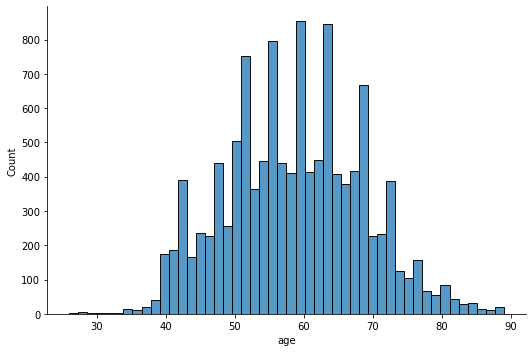

The skew of age is 0.10340375249862242 which indicates that it is fairly symmetric


In [30]:
sns.displot(data=cancer_patient, x='age', fill=True, height=5, aspect=1.5)
plt.show()
print("The skew of age is "+str(cancer_patient.age.skew()) + " which indicates that it is " + skew_cat(cancer_patient.age.skew()))

In [31]:
bins=[0,50,60,70,100]
labels=['1. 0-50 yrs', '2. 50-60 yrs', '3. 60-70 yrs', '4. 70+ years']
cancer_patient['age_group'] = pd.cut(x = cancer_patient['age'], bins = bins, labels = labels, include_lowest = True)


We can now analyze the **age** variable for **propensity of cancer**, **invasive cancer** or a **biopsy recommendation**

---
### <span style="color:teal">Bi-variate Analysis  <a class="anchor"  id="profile4"></a></span>
[Main Menu](#top) | [< prev](#profile3) | [next >](#profile5)


#### <span style="color:PaleVioletRed">Analysis of Age Variable  <a class="anchor"  id="profile5"></a></span>
[Main Menu](#top) | [< prev](#profile4) | [next >](#profile6)


#### <span style="color:PaleVioletRed">Age and Cancer diagnosis</span>

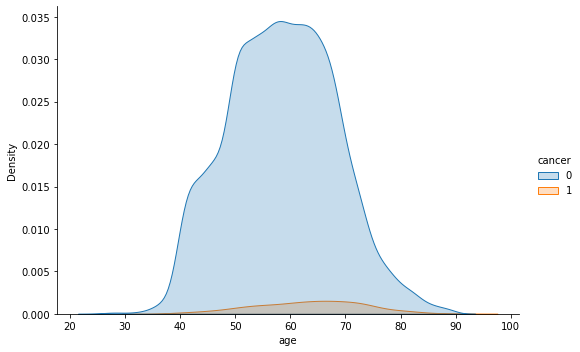

In [32]:
sns.displot(data=cancer_patient, x='age', hue='cancer', kind='kde', fill=True, height=5, aspect=1.5)
plt.show()

There is a slight skew towards higher age in the detection of cancer

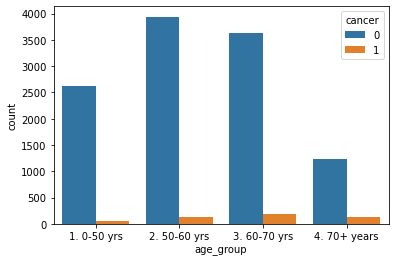

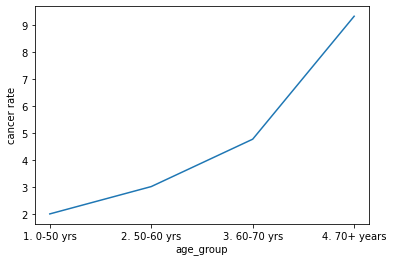

      age_group  cancer rate
0   1. 0-50 yrs         2.02
1  2. 50-60 yrs         3.03
2  3. 60-70 yrs         4.78
3  4. 70+ years         9.32


In [33]:
sns.countplot(data=cancer_patient, x='age_group', hue='cancer')
plt.show()
can_by_age=cancer_patient.groupby(['age_group'])['cancer'].apply(lambda x:round(x.sum()/x.count()*100,2)).reset_index()
can_by_age.rename(columns={'cancer':'cancer rate'},inplace=True)
sns.lineplot(data=can_by_age, x="age_group", y="cancer rate")
plt.show()

print(can_by_age)

- We can observe that **age** has a ***significant positive correlation*** with the diagnosis of breast cancer.

- The propensity of having cancer is **4.5 times higher in patients with age more than 70 years** when compared to those less than 50 years
- The propensity **almost doubles in patients over 70 years** when compared to those between 60 and 70
---

#### <span style="color:PaleVioletRed"> Age and Invasive Cancer diagnosis</span>

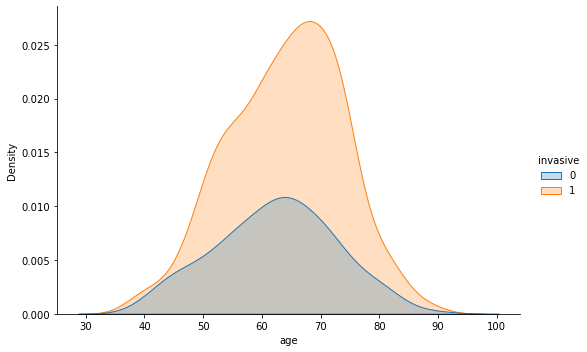

In [34]:
sns.displot(data=cancer_patient[cancer_patient.cancer==1], x='age', hue='invasive', kind='kde', fill=True, height=5, aspect=1.5)
plt.show()

Age does not seem to have an effect on cancer being invasive


---

#### <span style="color:PaleVioletRed">Age and Biopsy recommendation</span>

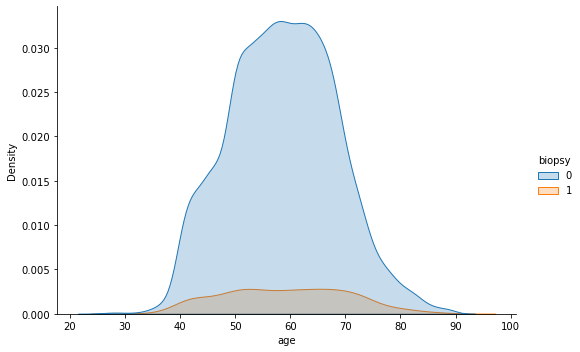

In [35]:
sns.displot(data=cancer_patient, x='age', hue='biopsy', kind='kde', fill=True, height=5, aspect=1.5)
plt.show()

Age also does not play a significant role with respect to the recommendations for biopsy

---

#### <span style="color:PaleVioletRed">Age and difficult negative cases</span>

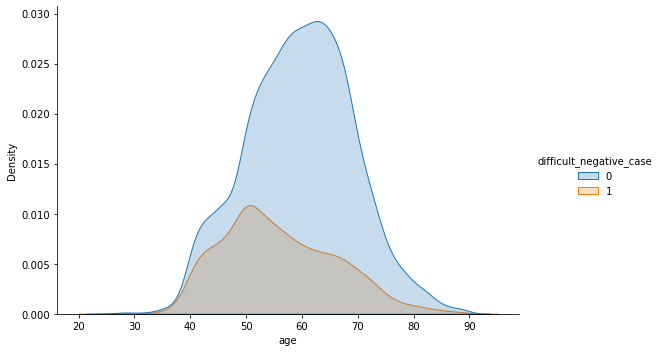

In [36]:
sns.displot(data=cancer_patient, x='age', hue='difficult_negative_case', kind='kde', fill=True, height=5, aspect=1.5)
plt.show()

Age of patients with a difficult negative case seems to be skewed towards younger patients

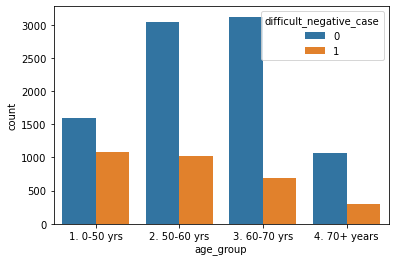

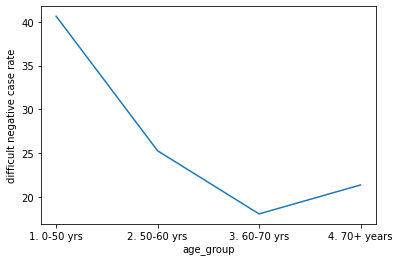

      age_group  difficult negative case rate
0   1. 0-50 yrs                         40.64
1  2. 50-60 yrs                         25.27
2  3. 60-70 yrs                         18.06
3  4. 70+ years                         21.37


In [37]:
sns.countplot(data=cancer_patient, x='age_group', hue='difficult_negative_case')
plt.show()
neg_by_age=cancer_patient.groupby(['age_group'])['difficult_negative_case'].apply(lambda x:round(x.sum()/x.count()*100,2)).reset_index()
neg_by_age.rename(columns={'difficult_negative_case':'difficult negative case rate'},inplace=True)
sns.lineplot(data=neg_by_age, x="age_group", y="difficult negative case rate")
plt.show()

print(neg_by_age)

We can observe that difficulty in a negative diagnosis is **more prevalent amongst younger patients**

---

#### <span style="color:PaleVioletRed">Other Bivariates</span>

For the analysis of **site_id** and **machine_id**, we'll create a patient level dataset with site and machine information

In [38]:
cancer_patient_loc=train.groupby(['patient_id','site_id','machine_id'])['biopsy','cancer','implant','invasive','difficult_negative_case'].sum().reset_index()

In [39]:
#changing sum to indicators
cancer_patient_loc['biopsy']=np.where(cancer_patient_loc['biopsy']>0,1,0)
cancer_patient_loc['implant']=np.where(cancer_patient_loc['implant']>0,1,0)
cancer_patient_loc['invasive']=np.where(cancer_patient_loc['invasive']>0,1,0)
cancer_patient_loc['cancer']=np.where(cancer_patient_loc['cancer']>0,1,0)
cancer_patient_loc['difficult_negative_case']=np.where(cancer_patient_loc['difficult_negative_case']>0,1,0)

In [40]:
cancer_patient_loc.shape

(11914, 8)

---
There is one patient with **multiple entries**. This means that atleast one patient has had the **diagnosis done on two separate machines**

---

In [41]:
print("\npatient_id with multiple entry\n")
print(cancer_patient_loc[cancer_patient_loc['patient_id'].duplicated()]['patient_id'])


patient_id with multiple entry

4123    22637
Name: patient_id, dtype: int64


In [42]:
cancer_patient_loc[cancer_patient_loc['patient_id']==22637]

,patient_id,site_id,machine_id,biopsy,cancer,implant,invasive,difficult_negative_case
4122,22637,1,93,0,0,0,0,1
4123,22637,1,190,0,0,0,0,1


Now we can see that patient with id **222637** had scanning done at **machine 93** and **machine 190**.

---

### <span style="color:teal"> Site Analysis  <a class="anchor"  id="profile6"></a></span>
[Main Menu](#top) | [< prev](#profile5) | [next >](#profile7)


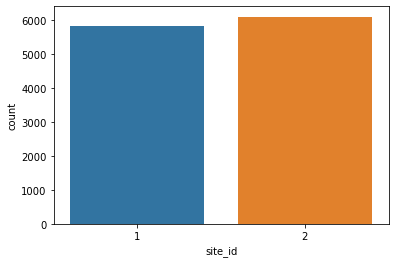

In [43]:
sns.countplot(data=cancer_patient_loc, x='site_id')
plt.show()

There's almost an **equal distribution** of patients between site 1 and site 2


---

#### <span style="color:PaleVioletRed">Site by Cancer diagnosis</span>

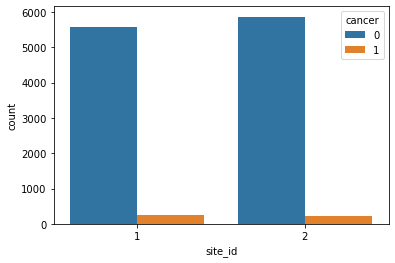

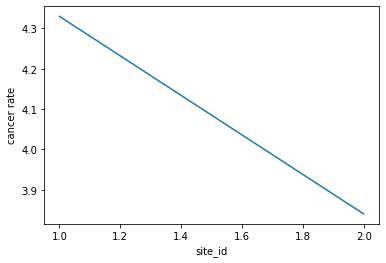

   site_id  cancer rate
0        1         4.33
1        2         3.84


In [44]:
sns.countplot(data=cancer_patient_loc, x='site_id', hue='cancer')
plt.show()
can_by_site=cancer_patient_loc.groupby(['site_id'])['cancer'].apply(lambda x:round(x.sum()/x.count()*100,2)).reset_index()
can_by_site.rename(columns={'cancer':'cancer rate'},inplace=True)
sns.lineplot(data=can_by_site, x="site_id", y="cancer rate")
plt.show()

print(can_by_site)

There **doesn't seem a significant difference** between the diagnosis rates of site 1 and site 2

---

#### <span style="color:PaleVioletRed">Site by biopsy</span>

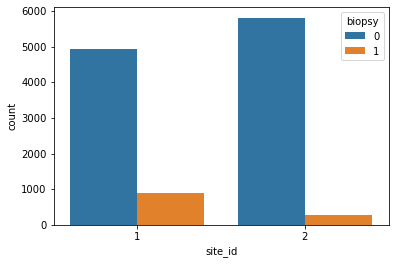

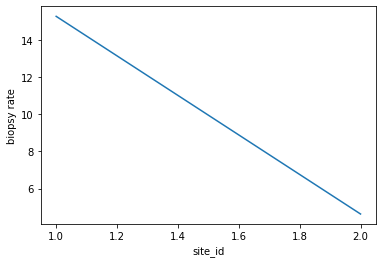

   site_id  biopsy rate
0        1        15.28
1        2         4.63


In [45]:
sns.countplot(data=cancer_patient_loc, x='site_id', hue='biopsy')
plt.show()
bio_by_site=cancer_patient_loc.groupby(['site_id'])['biopsy'].apply(lambda x:round(x.sum()/x.count()*100,2)).reset_index()
bio_by_site.rename(columns={'biopsy':'biopsy rate'},inplace=True)
sns.lineplot(data=bio_by_site, x="site_id", y="biopsy rate")
plt.show()

print(bio_by_site)

The biopsy recommendations rate at **site 1 is three times higher** than in site 2

---

#### <span style="color:PaleVioletRed">Site by difficult negative cases</span>

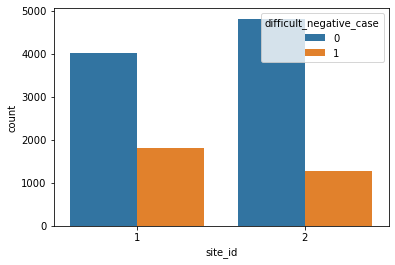

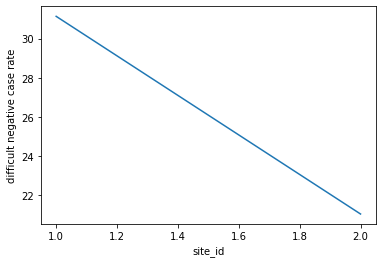

   site_id  difficult negative case rate
0        1                         31.14
1        2                         21.05


In [46]:
sns.countplot(data=cancer_patient_loc, x='site_id', hue='difficult_negative_case')
plt.show()
neg_by_site=cancer_patient_loc.groupby(['site_id'])['difficult_negative_case'].apply(lambda x:round(x.sum()/x.count()*100,2)).reset_index()
neg_by_site.rename(columns={'difficult_negative_case':'difficult negative case rate'},inplace=True)
sns.lineplot(data=neg_by_site, x="site_id", y="difficult negative case rate")
plt.show()

print(neg_by_site)

The difficulty in diagnosis of negative cases is **higher in site 1** than site 2

---

### <span style="color:teal">Machine Analysis  <a class="anchor"  id="profile7"></a></span>
[Main Menu](#top) | [< prev](#profile6) | [next >](#profile8) 

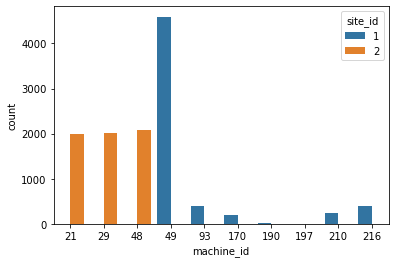

In [47]:
sns.countplot(data=cancer_patient_loc, x='machine_id', hue='site_id')
plt.show()

Machines most used are 
- #49 at site 1
- #21 at site 2
- #29 at site 2
- #48 at site 2
- other machines have low usage

It can be observed that while **site 2 has balanced load on all three machines** it has, **site 1 relies heavily on a single machine**

---

#### <span style="color:PaleVioletRed">Machine by Cancer Diagnosis</span>

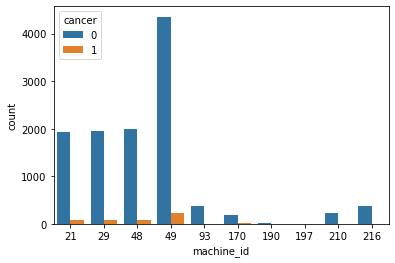

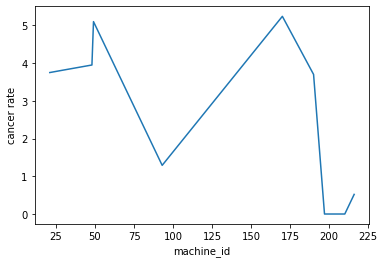

   machine_id  cancer rate
0          21         3.75
1          29         3.81
2          48         3.95
3          49         5.10
4          93         1.29
5         170         5.24
6         190         3.70
7         197         0.00
8         210         0.00
9         216         0.52


In [48]:
sns.countplot(data=cancer_patient_loc, x='machine_id', hue='cancer')
plt.show()
can_by_mac=cancer_patient_loc.groupby(['machine_id'])['cancer'].apply(lambda x:round(x.sum()/x.count()*100,2)).reset_index()
can_by_mac.rename(columns={'cancer':'cancer rate'},inplace=True)
sns.lineplot(data=can_by_mac, x="machine_id", y="cancer rate")
plt.show()

print(can_by_mac)

Amongst the four most used machines, patients diagnosed at machine #49 at site 1 have a higher cancer diagnosis rate

---

#### <span style="color:PaleVioletRed">Machine by biopsy recommendation</span>

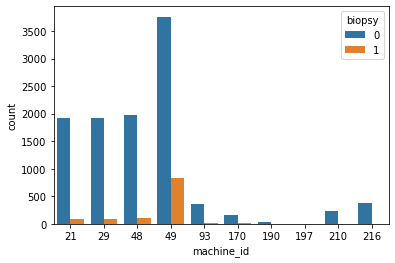

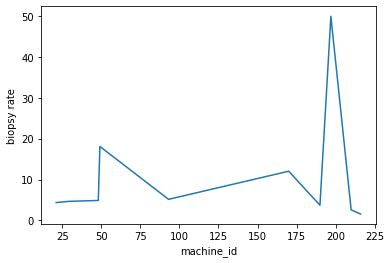

   machine_id  biopsy rate
0          21         4.35
1          29         4.65
2          48         4.87
3          49        18.11
4          93         5.15
5         170        12.04
6         190         3.70
7         197        50.00
8         210         2.56
9         216         1.55


In [49]:
sns.countplot(data=cancer_patient_loc, x='machine_id', hue='biopsy')
plt.show()
can_by_mac=cancer_patient_loc.groupby(['machine_id'])['biopsy'].apply(lambda x:round(x.sum()/x.count()*100,2)).reset_index()
can_by_mac.rename(columns={'biopsy':'biopsy rate'},inplace=True)
sns.lineplot(data=can_by_mac, x="machine_id", y="biopsy rate")
plt.show()

print(can_by_mac)

Patients scanned at machine #49 at site 1 have a **1 in 5 chance** of being recommended for biopsy

Scans at other frequently used machines (21,29 & 48) have less than **1/4th** of that rate

---

#### <span style="color:PaleVioletRed">Machine by difficult negative cases</span>

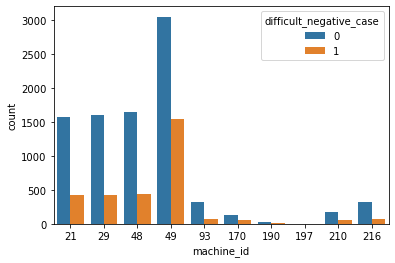

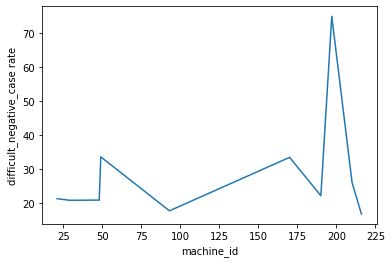

   machine_id  difficult_negative_case rate
0          21                         21.35
1          29                         20.88
2          48                         20.93
3          49                         33.65
4          93                         17.78
5         170                         33.51
6         190                         22.22
7         197                         75.00
8         210                         26.07
9         216                         16.84


In [50]:
sns.countplot(data=cancer_patient_loc, x='machine_id', hue='difficult_negative_case')
plt.show()
can_by_mac=cancer_patient_loc.groupby(['machine_id'])['difficult_negative_case'].apply(lambda x:round(x.sum()/x.count()*100,2)).reset_index()
can_by_mac.rename(columns={'difficult_negative_case':'difficult_negative_case rate'},inplace=True)
sns.lineplot(data=can_by_mac, x="machine_id", y="difficult_negative_case rate")
plt.show()

print(can_by_mac)

The patients scanned by machine #49 have **50% (33% vs ~21%) higher chances in being difficult to diagnose negatively** compared to those scanned by machines 21,29 and 48

---

### <span style="color:teal"> Bivariates with View  <a class="anchor"  id="profile8"></a></span>

[Main Menu](#top) | [< prev](#profile7) | [next >](#profile9)

For the analysis of **view**, we'll create a patient + view level dataset

In [51]:
cancer_patient_view=train.groupby(['patient_id','view'])['biopsy','cancer','implant','invasive','difficult_negative_case'].sum().reset_index()

In [52]:
#changing sum to indicators
cancer_patient_view['biopsy']=np.where(cancer_patient_view['biopsy']>0,1,0)
cancer_patient_view['implant']=np.where(cancer_patient_view['implant']>0,1,0)
cancer_patient_view['invasive']=np.where(cancer_patient_view['invasive']>0,1,0)
cancer_patient_view['cancer']=np.where(cancer_patient_view['cancer']>0,1,0)
cancer_patient_view['difficult_negative_case']=np.where(cancer_patient_view['difficult_negative_case']>0,1,0)

#### <span style="color:PaleVioletRed">Patient distribution by view</span>

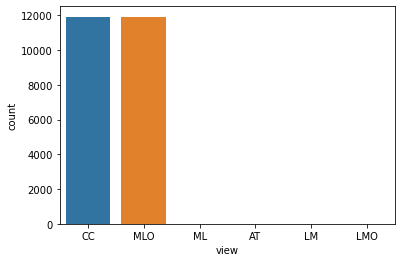

  view  patient_id
0   AT          14
1   CC       11913
2   LM           7
3  LMO           1
4   ML           6
5  MLO       11913


In [53]:
cancer_patient_view.groupby(['view'])['patient_id'].count().reset_index()
sns.countplot(data=cancer_patient_view, x='view')
plt.show()
print(cancer_patient_view.groupby(['view'])['patient_id'].count().reset_index())

**All patients** have be scanned with views **CC** and **MLO**. Other views are **negligible**

*Patient level stats will remain the same for CC & MLO views since all patients have both the views*
___

In [54]:
cancer_view=train.groupby(['view'])['biopsy','cancer','implant','invasive','difficult_negative_case'].apply(lambda x:round(x.sum()/x.count()*100,2)).reset_index()

In [55]:
cancer_view[(cancer_view['view'] =='MLO') | (cancer_view['view']=='CC')]

,view,biopsy,cancer,implant,invasive,difficult_negative_case
1,CC,5.49,2.11,2.64,1.51,14.08
5,MLO,5.35,2.11,2.76,1.47,14.08


**All rates are similar** for both CC and MLO view

---

### <span style="color:teal">BIRADS & Density</span>

**BIRADS** and **Density** have **information missing in almost half of the cases**.  <a class="anchor"  id="profile9"></a>

[Main Menu](#top) | [< prev](#profile8) | [next >](#insights)


In [56]:
den_pres=train[train['density'].isna()==False]['patient_id'].nunique()
print("\nDensity Information : Only "+ str(den_pres)+ "("+str(round(den_pres/total_patients*100,2))+"%) patients have density information available")
den_pres=train[train['BIRADS'].isna()==False]['patient_id'].nunique()
print("\nBIRADS Information : Only "+ str(den_pres)+ "("+str(round(den_pres/total_patients*100,2))+"%) patients have BIRADS information available")


Density Information : Only 5809(48.76%) patients have density information available

BIRADS Information : Only 7042(59.11%) patients have BIRADS information available


It does not make sense to do any analysis on them. It may lead to spurious insights

---
---

# <span style="color:lightcoral"> 5. Insights  <a class="anchor"  id="insights"></a> </span>
[Main Menu](#top) | [< prev](#profile9) | [next >](#insights1)

#### There are three aspects in which we can draw our insight
- **Data Insights** : The data being at image level warrants us to assess the process at an image level. These insights can lead to bettering of the diagnostic process
- **Patient Level Insights** : The data might be at image level, the impact, however, should be assessed at the patient level. Patient level insights will help in improving the care logistics
- **Impact of Age** : Age is a significant metric in the diagnosis and prevalence of cancer. Age is also important to understand from an elderly care perspective

### <span style="color:teal"> Data Insights  <a class="anchor"  id="insights1"></a> </span>
[Main Menu](#top) | [< prev](#insights) | [next >](#insights2)

- Training data is present at a scan **image level**. Each patient has a **minimum of four scan** images.
- Close to **1 in 20 scans** warrant a biopsy.
- About **2 in 5 biopsies** confirm the presence of breast cancer.
- Close to **1 in 50 scans** are diagnosed as positive for cancer.
- **70%** of all detected cancers are **invasive** which is concerning.
- In about **15%** of the images, negative diagnosis is difficult

![](https://lh3.googleusercontent.com/2F8gTjfTtmI5RtN_KKbSXZELoCNGsJs8NfWRIwWUe9Gery_pIQHfHTYl8I3sy1GhXQ4kBC7NQThGOdwgiICVTL8-KrBkO5fWVRpln5JsMFoyFQEcp0Wpz1atuRw7ClPYNz82CqByocoFNDasMNOEk1jS0OQraUakgswOwMJi9oJ7wBDYQuSuVFOFgJiFzVV2F7F6VkkffjvONNG7JB86eHIHNUqWwBHBo1h7wBBTsfsOgsrcdoMwdmkS_QYTMSIGLJjCu11mSlLNQAK7s6j_FD_-x4Vz2Xbin4Ub1jrPUHqHQ3jT6_zbzwB3JX_kz-DPSkXCPbiYJOlF6fpswiVhMTALWzPwfNYBW5DIL4vyFpafnOfopBNK3NU6VR3d_gsacEkqgUYpZooyaIimg_ckLMojZ-aVRKKaFd2zKN-CrzTE9D56bWwyWBmNDjngk4QQtDxLW4pTDev9c6YAKgfdwwdIOHzGmRbD_yUqjT0NsLAaCun8mDeZePdC2GTV2e6jnzAqIMxg5J-nyRWgr8glrU20mzAf6uEfU53SJvlv4C7RwWmUJ8L9vdRajVPrBzic4j2bgpS_Z_0FzaCw2GGYS3pCb9YuXR_npt85yq4VPOve9vzMKb2m2IxHVXazytMOkjSNXjbwEG5933Tcc0dMEvIrxwxkNVXERc-FV9-Lnj910_w4giwRdXL38KS_aEa_3Uyz1p5-FAazZmkrSwDO5ueDtsFX8XGI3qIjqmHWbnm7RkAriW_4bHKG4oio9fvQXr8CxAXUyjezmKIWnAyOVLud2YWQM85kGbm5c04cub4d7jloJp0jw4aZJWbHDgPpv3bXHvB4wjjyrOi2DrhwM8Hg2sKFtZqZXg3WgR7ejJ9h-FbFb-0HuL0ht3ZcfMBk1Q45uMRB_N2A2irm6Wnqas9FVg_4LSYqWRtXBXLgDgwzJdmxX4ZZU3Xk7SuuHL3I8MyTf-DdNnJlnCFUKL4=w2374-h1340-no?authuser=0)

---

### <span style="color:teal"> Patient Level Insights  <a class="anchor"  id="insights2"></a> </span>
[Main Menu](#top) | [< prev](#insights1) | [next >](#insights3)

- On average, each patient has **4.6 scan images**.
- Almost **one in every ten** scanned patients are recommended a **biopsy**.
- There is over a four in ten chance that a biopsy will confirm a cancer. In **more than five out ten cases**, the biopsy results are negative.
- With every **one in four patients** the negative diagnosis becomes **difficult**.
- Every **one in twenty-five** scanned patients are diagnosed with cancer.
- **70%** of patients diagnosed with cancer, are diagnosed with an **invasive** one.

![](https://lh3.googleusercontent.com/4hhuwsDvqwz5QMAD1Jg7U6ZgJRp1rHwCmXPfiT8pwJjlVTs65UnuePkZwiUGwGYf7tMu3bSQZucQ0_a5u-yShhtznuoEkrhib1e9Rml7V5ufW3pqmhPjQRwxPtGZUuSf7rTIzLxSbnCQ6K4BFvr_MH3E22GXg8inT2ObykKZCua5Vpqbj4LjAT7ajDe4EqoCbHEbh8VbDuDqnT9380gSGQt6TaDWxoN5a3e57EX4KpJW3yl_OnB6nr-PEIqbRB-WgKtbS4qkLi77NGP1qvJPoZxbmY4FIKWQvKQleKKNsxwxOUJ-P5MDBhyQgdRgKTIotXsiZviLiys3WRi4YqWjfqL5f0CwoT1U0ifMjrnOu7r6uHtRQlLMzn79-urwzajT1P33RGa0lSiD9Ul5v_zFhWOz4keozdQAZjSQSvsaIRG7auHPtU1iHmrYFPFyzqBu0U5hpqBCQWJucrT0wmBuEJaiJ8ROicMYM2PdpFR6Pd9iJd0F3GmspfvsPyay8mwU3c_xf5Yy8y5twz0KvTYhTVthEtByLHR5OBvQtbml3h98mVMWn_-5ywIixm4PPpSfQ8QWZZhJOaopXSjajcx2UKtFZiXdA5Tp7mH_Egk0N4ilUFuAERfqyKx-h8v_J1aHmXhnm2Kikf5QI7F1QeDEyxUAoUEftbC55wPBM4qqlu45YuV6E2PHkRWMoNKv8D_RCQ60COFH79Wu1ldE_5v-eadbk-TtSSV9SxPF1eJkEtVJfQdl16G1bFNnYd0ItU67j-gR0VAjCnPc0w1aWjmjLHCcaQGNdXhwZsZnWcKTq1ytVleciCQsCyAXY4xnN69X--mbW620Eye6xTk3q-JEay7yMgCl4WVbTpFue4PFmvjZA1HSdpglPWmtxEX1C5ScqXZowlQ_0iI9hWXIR4_uE8iRcuMO2duPYGPJFm4Ou2liGlRogfolD_76DxXFj9eBqAn-VMsloR37bqwpcw4=w2052-h1340-no?authuser=0)

---

### <span style="color:teal"> Age Related Insights  <a class="anchor"  id="insights3"></a> </span>
[Main Menu](#top) | [< prev](#insights2) | [next >](#conclusion)

- The chances of getting a positive cancer diagnosis for patients above the age of 70 are **4.5X** the chances for patients less than 50 years of age
- The rate of cancer **almost doubles** in age group above 70 years when compared to the age group between 50 and 60 years

![](https://lh3.googleusercontent.com/EiiIz1z8i8xAy9TU2FCBIUyLJ_zVYIlTxfF_v54jfYsvQPdc6rRS6baXI7yZo8prQssEkXIGNOlzDNNZsTlkbsiUHSioPI0_R3eYJuNW8UkM7nvtlLoKVFwmERT5O9hJLDrRUijzRxRhIMnfRQfmYNHbAxdIBz_MCVG3BGmTUrfRi91D8nL45FR1-W7ZYA2qpt8jx3hkklMifTpFDG_m_bAGJFmYoT1I4_Z0N_k8JeP-jGInomXJP_3HUQsi1axi91Uf4Y1mEoV-YTAe_eSyiH5z8MzqxJfIk2RK-xHfqNaxILDj1HPssXxPpsPmuHr-mmqRxM1fqBkoKGrIoaHG9gfgAZFDDhUPBVI_AzKPtU0QvTnceObp8FR42UvenbW1cOGOxfrMVbDk6ClVE5kqhCXGzi-Iyp5G3o-BeLR4hOj_7P_9xOrnwUC7L0hTr4oz6DmntZH3BRpwUBXMcIOwbGFEc9EbiccgkhRw_B_aqS7rlgu-FYABCQBNAs6o4oaGTAvGsuyKddtVTY4YrU8g31F0wm-vCTSBj_VWZU75cvODB4z_D1dIjVyGK4jOEzr1VlC5S9dO8EK_t_utzbniob-hlLAX9sRahtYsERvh-B7A6243IbdMLtnF0nlZjipVDd1NuE8A1DLLtfEdNQ8IRRFSzZFoizxIXmpbzW09WERUWZ0pKkfUIdNA3RJkWrFZsP7Uryik6TRerit5Zqu-ZYcc3zj7_eqhyU6kDaOEnPG6v4NjqAuDm335zXpPOW388YRnS4a1DEiHykOlLda0KHg0eHJFDxXl_RI3npI8zBUPfDMfBsUTcOlKSKOA_eUxXQkptkSPHnJ9bjgSnFoUlAzMw4IG3pENZrkZFZTtBLid-J1lQ_00XXGOSZuYC4KJyahF3emRgI78CPtlI9taacQBDlrsnc5d95HTyCeKeJSWZSL0eA505Wn_gG8mOz3i64cZkWorJ7SgHc8bQZg=w2410-h1340-no?authuser=0)

---

# <span style="color:lightcoral"> 6. Conclusion  <a class="anchor"  id="conclusion"></a> </span>
[Main Menu](#top) | [< prev](#insights3)

Early detection is key to successful treatment of breast cancer, and women are encouraged to get regular mammograms as part of their preventive healthcare. 

All through the analysis, there were two themes that emerged -
1. In more than half of the cases, the biopsies are not required.
2. For almost 25% of the patients, though they are negative for cancer, this diagnosis becomes difficult.

Cancer is a deadly disease and to wait for a diagnosis result can be excruciating. A model that will predict cancer with a higher degree of accuracy will ease both the patients' and the radiologists' stress. 

This analysis is, in no way, a big step towards building the model. I will continue the analysis of the scans and through computer vision techniques be able to build a good model that will help the society.

If you have reached here, I thank you for your patience. Please share your feedback.

---